In [1]:
data_path = '../data/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
sns.set_style('darkgrid')


%matplotlib inline

In [3]:
def pca_and_kernal(df, n = 10,scale = True,):
    if scale:
        df = Normalizer().fit_transform(df)
        
    pca = PCA(n)
    n_data = pca.fit_transform(df)
    # ploting the explained varianec
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    plt.plot(np.arange(1,len(cumsum)+1), cumsum,  marker= 'o')
    plt.xticks(np.arange(1,len(cumsum)+1))
    plt.axhline(y = cumsum[-1], color = 'r')
    plt.text(x = 2,y = cumsum[-1] -.0523 , s = 'exp-var =  {:.3}'.format(cumsum[-1]), fontdict={'color':'b','fontsize':12})
    plt.title('pca components vs explained variance', fontsize = 16, color = 'r')
    plt.xlabel('N-Components',fontsize = 14, color = 'r')
    plt.ylabel('Explained Variance',fontsize = 14,color = 'r' );
   
    return n_data

In [4]:
def hieraricial(df):
    l = linkage(df, method= 'complete')
    plt.figure(figsize = (18,13))
    dendrogram(l);

In [5]:
def kmeans(df, k = 3,):
    '''
    this function performs kmeans clustring, draws elbow method, plots classes count, plots tsne
    '''
    kmeans = KMeans(n_clusters= k, max_iter=500).fit(df)
    labels = kmeans.labels_
    
    intertia = []
    for i in range(1,30):
        km = KMeans(n_clusters=i).fit(df)
        intertia.append(km.inertia_)
    
    # plotting within class inertia (elbo method)
    fig, axs = plt.subplots(nrows= 1, ncols=2, figsize=(14,8))
    axs[0].plot(range(1,30), intertia, marker = 'x')
    axs[0].set_title('Elbow method', fontsize = 14, color = 'r')
    axs[0].set_xlabel('Components', fontsize = 12, color = 'r')
    axs[0].set_ylabel('Intertia', fontsize = 12, color = 'r')
    axs[0].set_xticks(range(1,30));
    
    # plotting the classes count
    
    sns.countplot(x = labels,palette='viridis', ax= axs[1])
    plt.xlabel('K-means Clusters',fontsize = 12, color = 'r')
    plt.title('count per class', fontsize = 14, color = 'r');
    
    return labels


In [6]:
def dbscan(df, eps, min_samples = 30):
    dbscan = DBSCAN(eps = eps, min_samples= min_samples).fit(df)
    dblabels = dbscan.labels_
    
    #plot dbscan clusters count
    sns.countplot(x = dblabels)
    # plt.xticks(['noise','0','1','2','3'])
    plt.xlabel('clusters' , fontsize = 14);
    return dblabels

In [7]:
def plot_tsne_2d(data, clusters_labels, who = 'K-Means' , perform_tsne= False):
    '''
    plot tsne rsults if not done perform tsne
    parmas:
        data : ndarray tsne data result/ df to perform tsne on
        cluster_labels : 1D array it data is tsne result else it is none
        perform_tsne: bool default False if true it will perform tsne on the data
    '''
    if perform_tsne:
        tsne_data = TSNE(init= 'pca', learning_rate='auto').fit_transform(data)
    else:
        tsne_data = data
    
    plt.figure(figsize=(13,13))
    sns.scatterplot(tsne_data[:,0],tsne_data[:,1] , c= clusters_labels)
    plt.title('TSNE with '+ who+ ' clustering results', fontsize = 16, color = 'r')

In [8]:
def EM_model(df, n = 3):
    gmm  = GaussianMixture(n_components= n).fit(df)
    labels = gmm.predict(df)
    return labels

___

___

# preprocessed data without transformation

In [9]:
df = pd.read_csv(data_path + 'processed_data.csv', index_col='CUST_ID')

## PCA

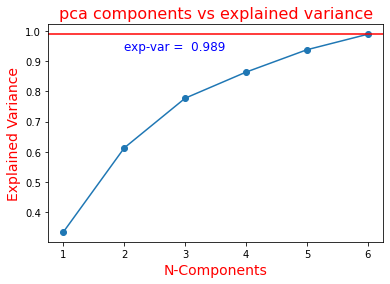

In [10]:
df_pca = pca_and_kernal(df, n = 6)

## hierarichial 

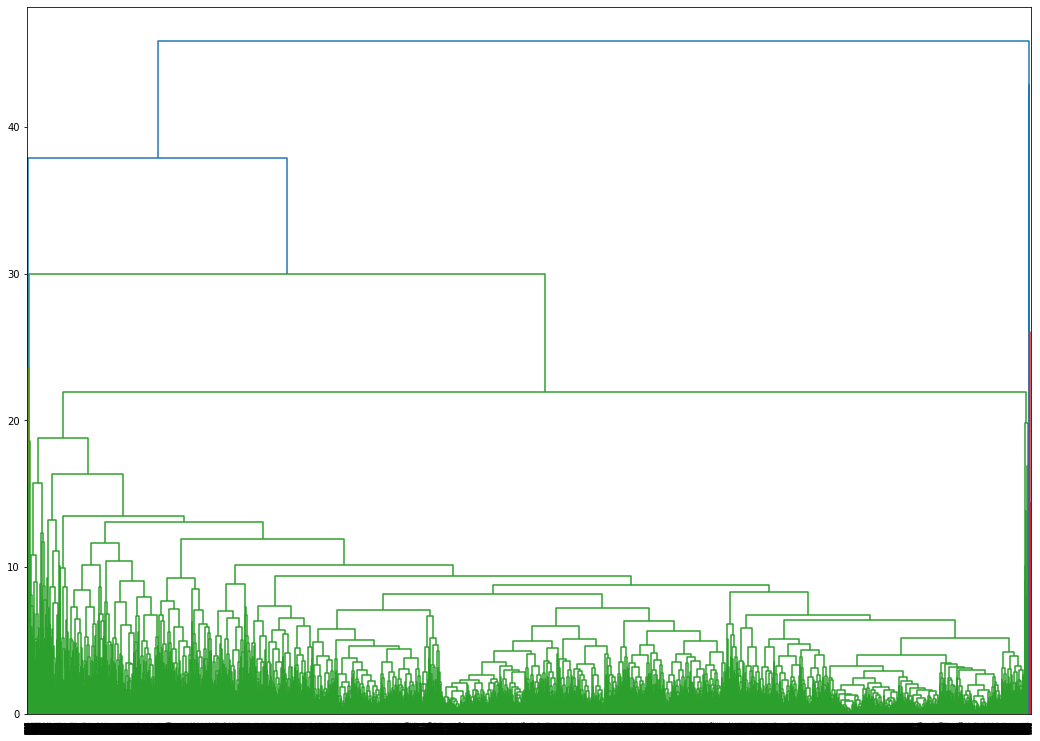

In [38]:
hieraricial(df_pca)

## K-Means Clustring

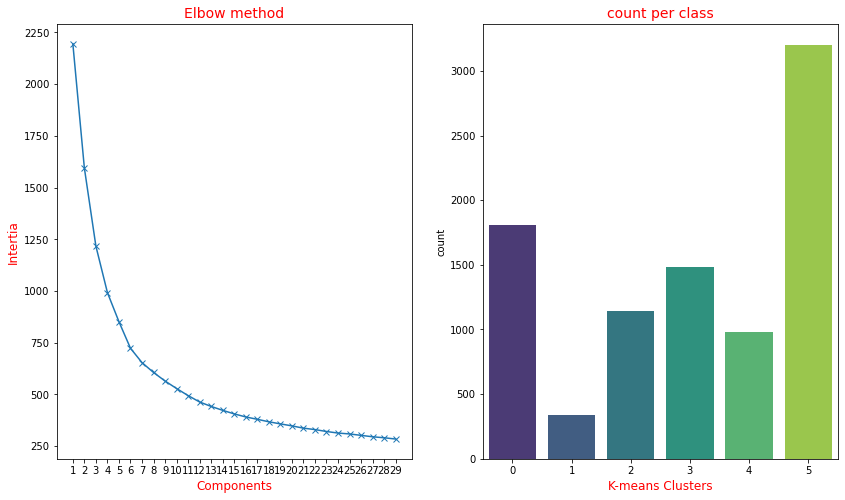

In [12]:
km_labels = kmeans(df_pca, k = 6)

### silhouette_score

In [15]:
sc = silhouette_score(df_pca, km_labels)
print('K Means silhouette_score is:',sc)

K Means silhouette_score is: 0.37076950177035783


## DBScan

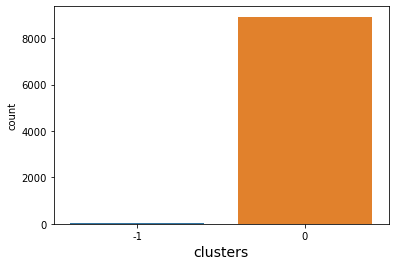

In [16]:
db_labels = dbscan(df_pca, eps = .3, min_samples= 30)

### silhouette_score

In [17]:
sc_db = silhouette_score(df_pca, db_labels)
print('K Means silhouette_score is:',sc_db)

K Means silhouette_score is: 0.29467799061202177


## EM

In [18]:
em_labels = EM_model(df_pca)

In [19]:
sc_em = silhouette_score(df_pca, em_labels)
print('K Means silhouette_score is:',sc_em)

K Means silhouette_score is: 0.18330869559263177


## TSNE

In [76]:
tsne_data = TSNE().fit_transform(df_pca)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/home/mahmoud/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


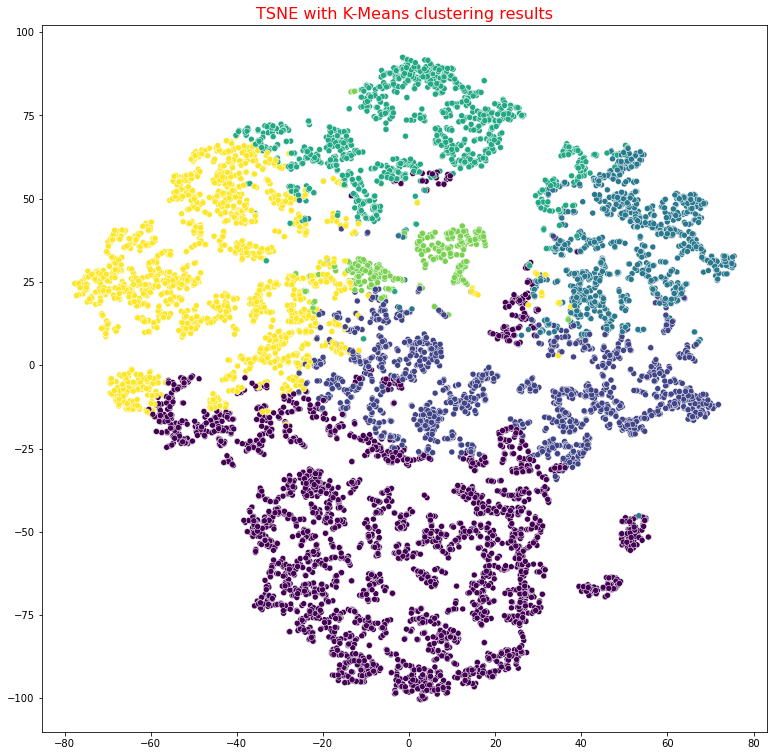

In [102]:
plot_tsne_2d(tsne_data, km_labels,)

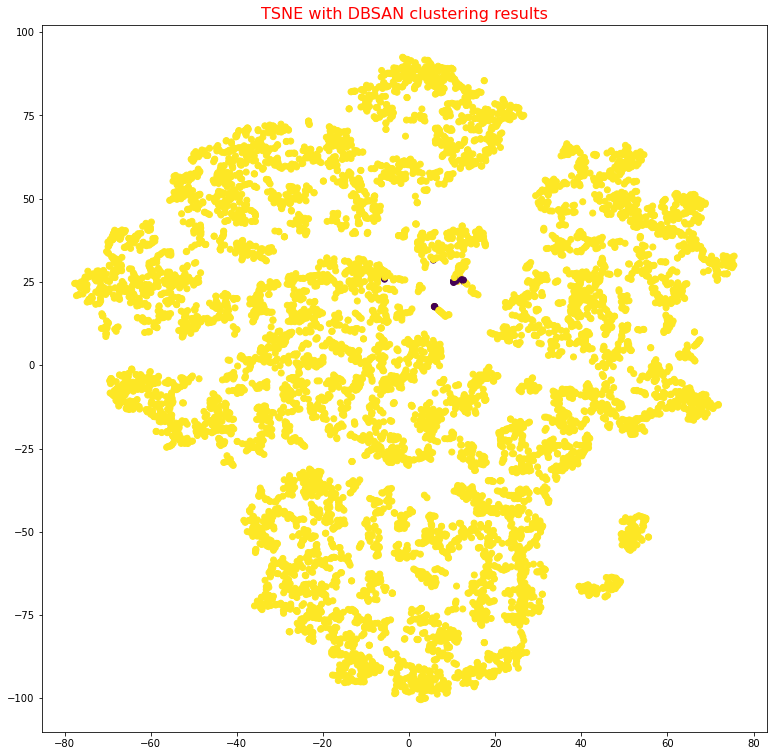

In [78]:
plot_tsne_2d(tsne_data, db_labels,'DBSAN')

/home/mahmoud/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


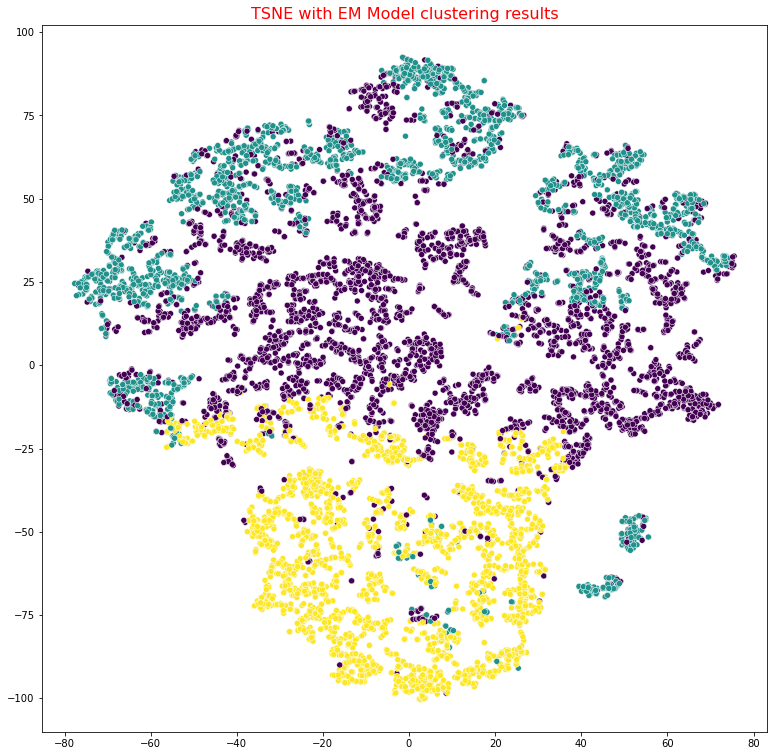

In [133]:
plot_tsne_2d(tsne_data, em_labels, 'EM Model')

# Processed & Log Transformed Data

In [10]:
df1 = pd.read_csv(data_path + 'log_data.csv', index_col='CUST_ID')

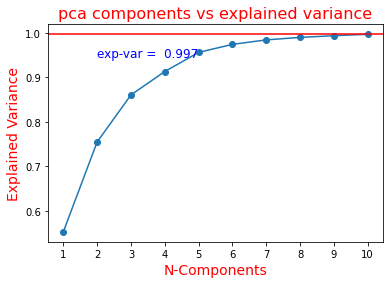

In [12]:
df1_pca = pca_and_kernal(df1, )

## Hierarchial

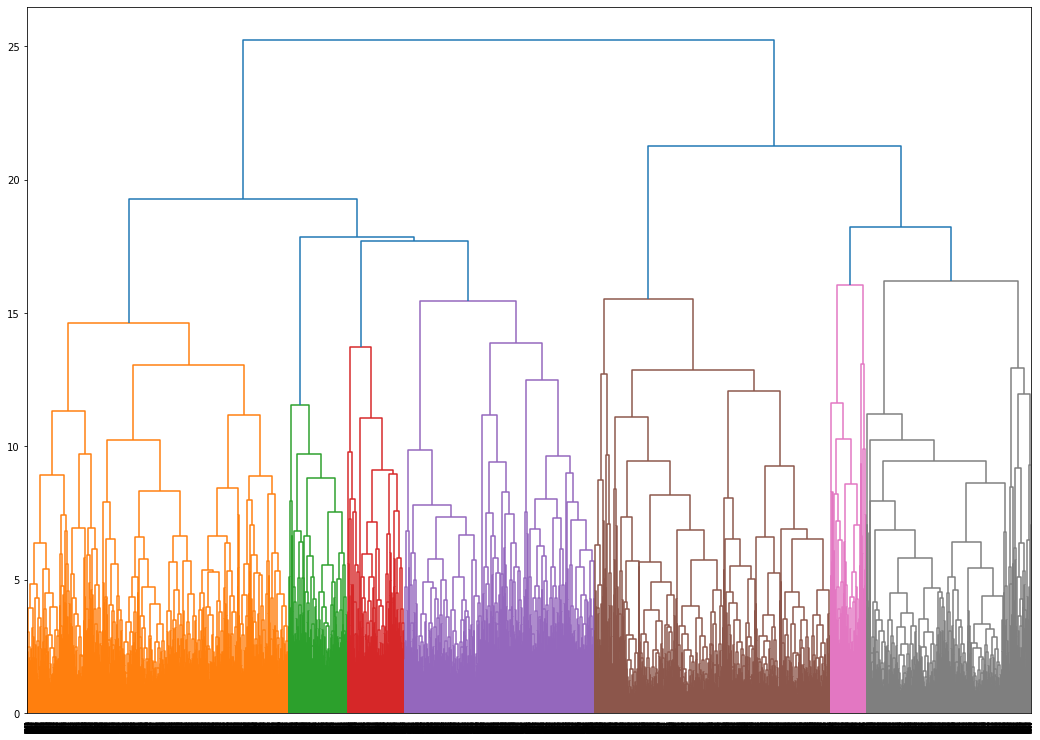

In [134]:
hieraricial(df1)

## K-Means

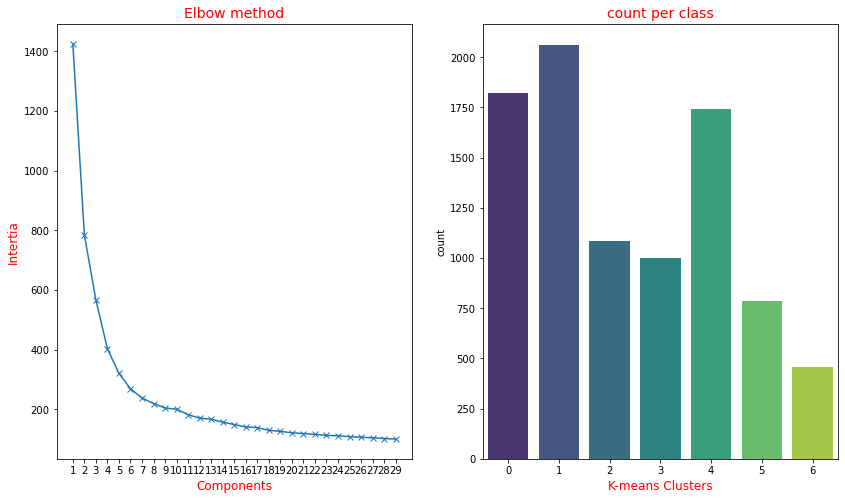

In [22]:
km_lables_log = kmeans(df1_pca,k=7)

### silhouette_score

In [23]:
sc_lkm = silhouette_score(df1_pca, km_lables_log)
print('K Means silhouette_score is:',sc_lkm)

K Means silhouette_score is: 0.5058267517516021


## DBScan

### elbow method to choose eps

In [9]:
from sklearn.neighbors import NearestNeighbors

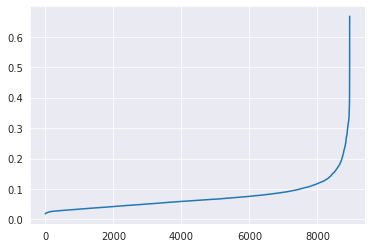

In [50]:
nn = NearestNeighbors(n_neighbors= 24).fit(df1_pca)
dist, _ = nn.kneighbors()
distt = np.sort(dist[:,-1])
sns.lineplot(x = range(len(distt)), y = distt);

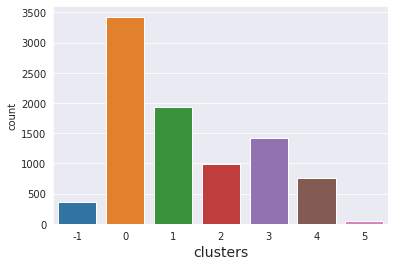

In [51]:
db_labels = dbscan(df1_pca, eps = .12, min_samples=23)

### silhouette_score

In [52]:
sc_ldb = silhouette_score(df1_pca, db_labels)
print('K Means silhouette_score is:',sc_ldb)

K Means silhouette_score is: 0.41825382937268635


## EM 

In [30]:
em_llables = EM_model(df1_pca, n= 6)

### silhouette_score

In [31]:
sc_lem = silhouette_score(df1_pca, em_llables)
print('K Means silhouette_score is:',sc_lem)

K Means silhouette_score is: 0.4802011030950849


## TSNE

In [35]:
tsne_ldata = TSNE(perplexity= 20,init= 'pca', learning_rate='auto').fit_transform(df1_pca)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


/home/mahmoud/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


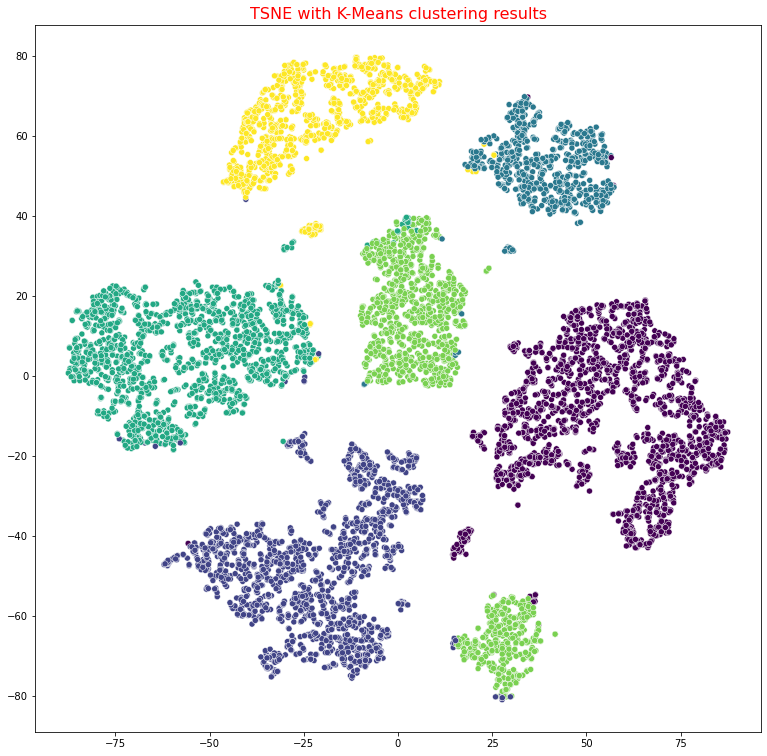

In [104]:
plot_tsne_2d(tsne_ldata, km_lables_log,)

/home/mahmoud/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


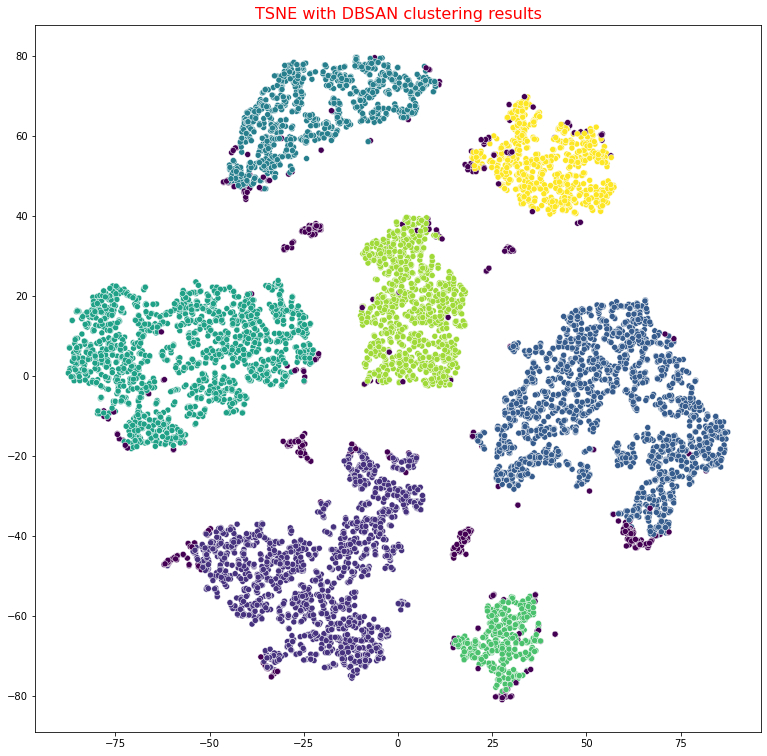

In [159]:
plot_tsne_2d(tsne_ldata, db_labels,'DBSAN')

In [ ]:
tsne3 = TSNE(n_components= 3, init= 'pca', learning_rate='auto').fit_transform(df1_pca)

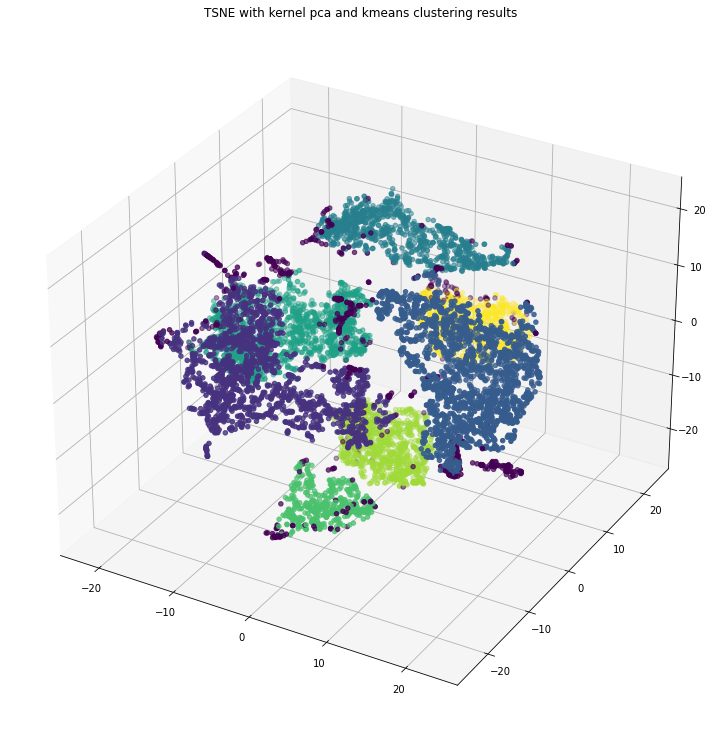

In [128]:
plt.figure(figsize=(13,13))
ax = plt.axes(projection = '3d')
ax.scatter(tsne3[:,0],tsne3[:,1], tsne3[:,2] ,c=db_labels )
plt.title('TSNE with kernel pca and kmeans clustering results');

/home/mahmoud/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


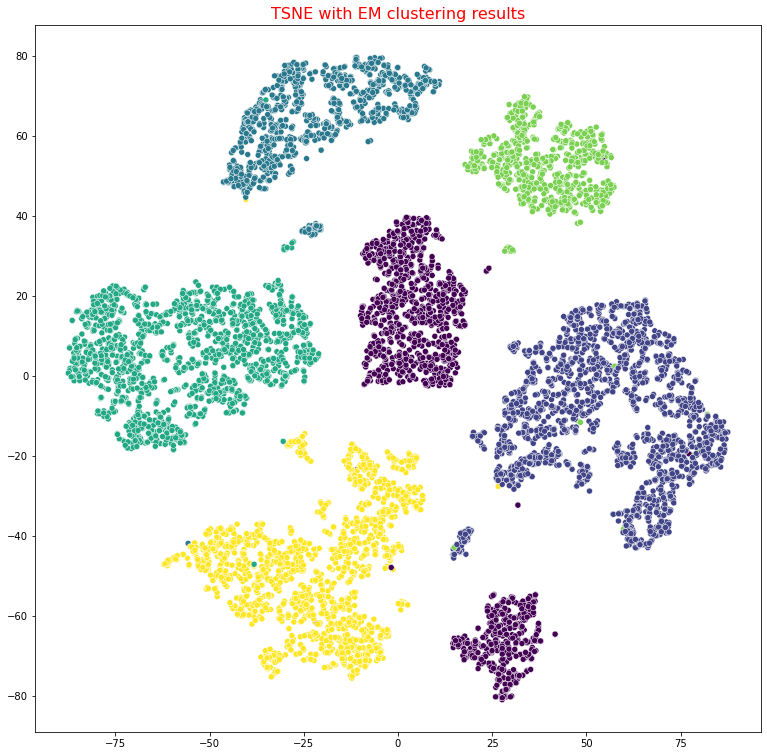

In [34]:
plot_tsne_2d(tsne_ldata, em_llables,'EM',)

## Conclusion

### -  At the begineing the data without transformation was bad and no visible clusters and silhouette_score was bad in all clustring algos (dbscan, kmeans, hierarchial, EM)
### - Using log Transformed data clusters started to show up clearly in hierarchial clustring it has 7 clusters and other algos detected that but still silhouette score increased to 0.48
### - But still there is noise everywhere I don't understand why and it seems there are overlabing in clustring while I am doing hard clustring 
### - I tried to visualize it in 3D to better inspect but I didn't learn more
### - I Think this may be due to outliers, I will try remove them in another notebook and see the effect